<a href="https://colab.research.google.com/github/tanjimanasreen/CPP-Programming-Exercises/blob/main/Restaurant_Scrapper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries
---

In [1]:
%%capture

!pip install python-google-places
!pip install langdetect
!pip install bnlp_toolkit
!wget https://www.omicronlab.com/download/fonts/kalpurush.ttf
!wget https://www.omicronlab.com/download/fonts/Siyamrupali.ttf
!pip install folium
!pip install geopandas 

In [2]:
from googleplaces import GooglePlaces, types, lang
import time
import pandas as pd

from IPython.display import Markdown, display

import seaborn as sns
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
from wordcloud import WordCloud
import re

def printmd(string):
  display(Markdown(string))

from langdetect import detect
import unicodedata
import html

import folium
# Import folium MarkerCluster plugin
from folium.plugins import MarkerCluster
# Import folium MousePosition plugin
from folium.plugins import MousePosition
# Import folium DivIcon plugin
from folium.features import DivIcon

# Location Dataset 
---
This dataset contains the list of Upazilla/Thana for Different Districts of Bangladesh.

Credit : [Mobile network coverage in Bangladeshi Upazila or Thana - kaggle](https://www.kaggle.com/mushfiqurrobin/network-coverage)

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d mushfiqurrobin/network-coverage

!mkdir network-coverage
!unzip network-coverage.zip -d network-coverage

  0% 0.00/369k [00:00<?, ?B/s]
100% 369k/369k [00:00<00:00, 42.9MB/s]
Archive:  network-coverage.zip
  inflating: network-coverage/Coverage.csv  


In [ ]:
df = pd.read_csv("/content/network-coverage/Coverage.csv")

df_area = df[['Upazila_or_Thana', 'District']]

# Checking For Missing Values
total = df_area.isnull().sum().sort_values(ascending=False)
percent = (df_area.isnull().sum()/df_area.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent*100], axis=1, keys=['Total', 'Percent'])
display(missing_data.head(5))

Total  Percent
District              0      0.0
Upazila_or_Thana      0      0.0

In [ ]:
# Checking for Duplicate Rows 
df_area.duplicated().sum()

21800

In [ ]:
# Dropping Duplicates
df_area.drop_duplicates(keep="first", inplace=True)
df_area.reset_index(drop=True, inplace=True)

df_area.to_csv("locations.csv", index=False)

# Initialization
---
Here, I am combining the Upazilla/Thana and its dedicated District into a string and storing them into ``` locations``` list. Later I will use this list for the searching query.

I have also intialized the searching ``` radius ``` to 2000 Meter or 2 KM. 

Finally, I will store the Restaurants' information into ```restaurant_data``` 



In [ ]:
API_KEY = "YOUR API KEY"

google_places = GooglePlaces(API_KEY)

restaurant_data = []
radius = 2000

# Converting the list of Upazilla/Thana and District into a combined string
locations = []
list_areas = df_area.values.tolist()

for area in list_areas:
  location_name = ', '.join([str(item) for item in area])
  locations.append(location_name)

print(locations)

['Kawkhali, Pirojpur', 'Mathbaria, Pirojpur', 'Nazirpur, Pirojpur', 'Nesarabad, Pirojpur', 'Pirojpur Sadar, Pirojpur', 'Zianagar, Pirojpur', 'Akhaura, Brahmanbaria', 'Ashuganj, Brahmanbaria', 'Brahmanbaria Sadar, Brahmanbaria', 'Bancharampur, Brahmanbaria', 'Bijoynagar, Brahmanbaria', 'Kasba, Brahmanbaria', 'Nabinagar, Brahmanbaria', 'Nasirnagar, Brahmanbaria', 'Sarail, Brahmanbaria', 'Alikadam, Bandarban', 'Bandarban Sadar, Bandarban', 'Lama, Bandarban', 'Naikhongchhari, Bandarban', 'Rowangchari, Bandarban', 'Ruma, Bandarban', 'Thanchi, Bandarban', 'Chandpur Sadar, Chandpur', 'Faridganj, Chandpur', 'Haimchar, Chandpur', 'Hajiganj, Chandpur', 'Kachua, Chandpur', 'Matlab (Dakshin), Chandpur', 'Matlab (Uttar), Chandpur', 'Shahrasti, Chandpur', 'Anwara, Chittagong', 'Banskhali, Chittagong', 'Boalkhali, Chittagong', 'Chandanish, Chittagong', 'Fatikchari, Chittagong', 'Karnaphuli, Chittagong', 'Lohagara, Chittagong', 'Mirsharai, Chittagong', 'Patiya, Chittagong', 'Rangunia, Chittagong', 'Ra

# Restaurant Scraper 

---



In [ ]:
for location in locations:
  print("---------------------", location, "-----------------------")
  query_result = google_places.nearby_search(
          location=location, keyword='Restaurant',
          radius=radius) 

  if query_result:
  
    for place in query_result.places:
      place.get_details()

      place_id = place.details.get('place_id')
      name = place.name
      latitude = place.geo_location.get('lat')
      longitude = place.geo_location.get('lng')
      rating = place.rating
      number_of_reviews = place.details.get('user_ratings_total')
      affluence = place.details.get('price_level')
      address = place.formatted_address

      restaurant_data.append([place_id, name, latitude, longitude, rating, number_of_reviews, affluence, address])
      # print(place.details)

    # print(restaurant_data)
    print("--------------------- Scrapped Restaurants: ", len(restaurant_data))
    time.sleep(5) 

    while query_result.has_next_page_token:
        query_result = google_places.nearby_search(location=location, keyword='Restaurant',
            radius=radius, pagetoken=query_result.next_page_token)
        
        for place in query_result.places:
          place.get_details()

          place_id = place.details.get('place_id')
          name = place.name
          latitude = place.geo_location.get('lat')
          longitude = place.geo_location.get('lng')
          rating = place.rating
          number_of_reviews = place.details.get('user_ratings_total')
          affluence = place.details.get('price_level')
          address = place.formatted_address

          restaurant_data.append([place_id, name, latitude, longitude, rating, number_of_reviews, affluence, address])
          # print(place.details)
        # print(restaurant_data)  
        print("--------------------- Scrapped Restaurants: ", len(restaurant_data))
        time.sleep(5) 

  time.sleep(5)

# Dumping the data into a DataFrame
df_restaurant = pd.DataFrame(restaurant_data, columns=['place_id', 'name', 'latitude', 'longitude', 'rating', 'number_of_reviews', 'affluence', 'address'])

df_restaurant.to_csv("restaurants.csv", index=False, encoding='utf-8')

# Data Preparation

---


In [ ]:
restaurant_df = pd.read_csv("/content/restaurants.csv", encoding='utf-8')

display(restaurant_df.duplicated().sum())

1945

**There are 1945 Duplicate Data present in the dataframe.**

In [ ]:
restaurant_df.drop_duplicates(keep="first", inplace=True)

**Here, I kept the address of each restaurant to check whether they are in Bangladeh or Not. As we can see below, 62 restaurants are in India.**

In [ ]:
res_not_bangladesh = restaurant_df[restaurant_df['address'].str.contains('Bangladesh')==False]
res_not_bangladesh

place_id  ...                                            address
2249  ChIJM3pmh-oZUzcRxEj0i0X72NM  ...           2P3H+HXJ, Sabroom, Tripura 799145, India
2252  ChIJ2dxRyT0ZUzcRVlumPmgbV3c  ...  Pushpa fast food chotokhil Rd, opposite of bag...
2258  ChIJi_nlqHcZUzcRKjNPd5Cctnk  ...           2P3H+3WR, Sabroom, Tripura 799145, India
2264  ChIJAWkn0lsZUzcRI1rLiUVf23o  ...           2P5G+M82, Sabroom, Tripura 799145, India
6347  ChIJczRZgTMB-zkRgvpD1QO1Yt8  ...                    Aiho, West Bengal 732121, India
...                           ...  ...                                                ...
8967  ChIJZxA1UjjTUTcRh4Rn0s1dzog  ...           V9C5+HQ6, Karimganj, Assam 788710, India
8968  ChIJS34qNcrTUTcRnUTJMI3uwL0  ...  Main Road, opp. Congress Office, Karimganj, As...
8969  ChIJw27U4zvTUTcRx5sfB5fjcPU  ...   Circuit House Rd, Karimganj, Assam 788710, India
8970  ChIJ7WS_-EPTUTcRmnPXC2fm4W4  ...  Shiv Bari Rd, Near Shib Mandir, Karimganj, Ass...
8971  ChIJ2VCwvvzTUTcRyJM86bkiGzU  ...         Station Rd, Karimganj, Assam 788710, India

[62 rows x 8 columns]

In [ ]:
restaurant_df = restaurant_df[restaurant_df['address'].str.contains('Bangladesh')==True]
restaurant_df.reset_index(drop=True, inplace=True)

**Now the dataframe ```restaurant_df``` contains only Bangladeshi restaurants.**

Number of rows with at least 1 missing values: 9675
Number of columns with missing values: 3

Missing percentage (desceding):


Total    Percent
affluence           9672  90.426328
number_of_reviews   2528  23.635004
rating                 1   0.009349

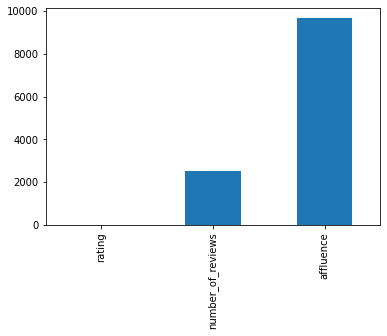

In [ ]:
def missing_value_describe(data):
    # check missing values in the data
    total = data.isna().sum().sort_values(ascending=False)
    missing_value_pct_stats = (data.isnull().sum() / len(data)*100)
    missing_value_col_count = sum(missing_value_pct_stats > 0)

    # missing_value_stats = missing_value_pct_stats.sort_values(ascending=False)[:missing_value_col_count]
    missing_data = pd.concat([total, missing_value_pct_stats], axis=1, keys=['Total', 'Percent'])

    print("Number of rows with at least 1 missing values:", data.isna().any(axis = 1).sum())
    print("Number of columns with missing values:", missing_value_col_count)

    if missing_value_col_count != 0:
        # print out column names with missing value percentage
        print("\nMissing percentage (desceding):")
        display(missing_data[:missing_value_col_count])

        # plot missing values
        missing = data.isnull().sum()
        missing = missing[missing > 0]
        missing.sort_values(inplace=True)
        missing.plot.bar()
    else:
        print("No missing data!!!")

# pass a dataframe to the function
missing_value_describe(restaurant_df)

**Converting the Affluence Level ```1.0, 2.0, 3.0...``` to ```$, $$, $$$...```**

In [ ]:
restaurant_df['affluence'] = restaurant_df['affluence'].replace([1.0, 2.0, 3.0, 4.0],['$', '$$', '$$$', '$$$$'])
restaurant_df[restaurant_df['affluence'].notna()==True]

place_id  ...                                            address
12     ChIJJwuMBKoLADoRcGUOid7tMUg  ...                    7XP5+M89, Mathbaria, Bangladesh
30     ChIJR6ppFA5RVTcR7vhuJ_FPWME  ...        Swarupkathi Bridge, Swarupkathi, Bangladesh
81     ChIJkdicn2gBADoRZgU_lUomDDw  ...    Post Office Rd, Pirojpur Pourashava, Bangladesh
87     ChIJEyplIFEAADoRw_6MExFtfr8  ...          HXH9+QVR, Pirojpur Pourashava, Bangladesh
92     ChIJIRrrteQJVDcRi_9mQMEBerA  ...  Shahid Amir Hossen Road (1st floor, আখাউড়া, B...
...                            ...  ...                                                ...
10669  ChIJ-daAjkXu-zkRKA09tfrQTSI  ...  Ground floor,1st and 2nd Floor, B.G.B Gate Rif...
10681  ChIJKx-b407u-zkR7VQuYVQ6ysk  ...                    R685, Rajshahi 6203, Bangladesh
10685  ChIJbUqeQkXu-zkRPx152Vjuq3w  ...  Bisik Match Factory Moor, Sapura, Boalia, Rajs...
10686  ChIJJ0af2v_u-zkRhBVjVemblw0  ...                     9HGV+89J, Rajshahi, Bangladesh
10694  ChIJB-JYPK3v-zkRzte9zqVK9vY  ...              Station Rd, Rajshahi 6000, Bangladesh

[1024 rows x 8 columns]

**Saving the final dataframe into CSV**

In [ ]:
final_df = restaurant_df[['name',	'latitude',	'longitude',	'rating',	'number_of_reviews',	'affluence']]
display(final_df)
final_df.to_csv("bangladesh_restaurants.csv", index=False, encoding='utf-8')

name  ...  affluence
0               Jamal Store, Joykul Bazaar  ...        NaN
1                     Salma Varaitis Store  ...        NaN
2                       হাজী বিরিয়ানি হাউজ  ...        NaN
3             নিউ মুসলিম সুইটস এণ্ড বেকারি  ...        NaN
4      মেসার্স সততা হোটেল এন্ড রেস্টুরেন্ট  ...        NaN
...                                    ...  ...        ...
10691                         Green castle  ...        NaN
10692                          Matir Manus  ...        NaN
10693                      NR Home Kitchen  ...        NaN
10694           Bindu Hotel And Restaurant  ...          $
10695      ডালাস হোটেল অ্যান্ড রেস্টুরেন্ট  ...        NaN

[10696 rows x 6 columns]

# Data Analysis

---



In [3]:
bd_restaurant = pd.read_csv("/content/bangladesh_restaurants.csv", encoding='utf-8')
display(bd_restaurant)

name  ...  affluence
0               Jamal Store, Joykul Bazaar  ...        NaN
1                     Salma Varaitis Store  ...        NaN
2                       হাজী বিরিয়ানি হাউজ  ...        NaN
3             নিউ মুসলিম সুইটস এণ্ড বেকারি  ...        NaN
4      মেসার্স সততা হোটেল এন্ড রেস্টুরেন্ট  ...        NaN
...                                    ...  ...        ...
10691                         Green castle  ...        NaN
10692                          Matir Manus  ...        NaN
10693                      NR Home Kitchen  ...        NaN
10694           Bindu Hotel And Restaurant  ...          $
10695      ডালাস হোটেল অ্যান্ড রেস্টুরেন্ট  ...        NaN

[10696 rows x 6 columns]

In [66]:
bd_restaurant.describe()

latitude     longitude        rating  number_of_reviews
count  10696.000000  10696.000000  10695.000000        8168.000000
mean      23.811142     90.290969      3.122422         112.568560
std        1.048579      1.033504      1.865074         550.342005
min       20.856284     88.128098      0.000000           1.000000
25%       23.034571     89.516242      1.000000           2.000000
50%       23.765771     90.364833      4.000000           6.000000
75%       24.502531     90.983450      4.400000          37.000000
max       26.494126     92.438711      5.000000       17655.000000

**Looks like some of the names are in Bangla. Lets separate the restaurants' that have their names in Bangla.**

In [4]:
reg = re.compile(r'[a-zA-Z]')

bd_restaurant["name_type"] = bd_restaurant["name"].apply(lambda x: "English" if reg.match(x) else "Bangla")

en_bd_restaurant = bd_restaurant[bd_restaurant['name_type'] == "English"]
non_en_bd_restaurant = bd_restaurant[bd_restaurant['name_type'] == "Bangla"]    

printmd("### Restaurants With English Name")
display(en_bd_restaurant)
printmd("### Restaurants With Bangla Name")
display(non_en_bd_restaurant)


### Restaurants With English Name

name   latitude  ...  affluence  name_type
0      Jamal Store, Joykul Bazaar  22.604275  ...        NaN    English
1            Salma Varaitis Store  22.619158  ...        NaN    English
5                Sharif food fair  22.289866  ...        NaN    English
11        Food Club The Caterer's  22.287912  ...        NaN    English
13     New Muslim Sweets & bekare  22.288718  ...        NaN    English
...                           ...        ...  ...        ...        ...
10690             lead generation  24.374515  ...        NaN    English
10691                Green castle  24.374087  ...        NaN    English
10692                 Matir Manus  24.374515  ...        NaN    English
10693             NR Home Kitchen  24.373602  ...        NaN    English
10694  Bindu Hotel And Restaurant  24.374020  ...          $    English

[7527 rows x 7 columns]

### Restaurants With Bangla Name

name  ...  name_type
2                                     হাজী বিরিয়ানি হাউজ  ...     Bangla
3                           নিউ মুসলিম সুইটস এণ্ড বেকারি  ...     Bangla
4                    মেসার্স সততা হোটেল এন্ড রেস্টুরেন্ট  ...     Bangla
6                                   সোহেল রানা কাটোল ফাম  ...     Bangla
7           মেসার্স সৌখিন ষ্টীল এন্ড পার্টেক্স ফার্নিচার  ...     Bangla
...                                                  ...  ...        ...
10661                                          ১৩ পার্বন  ...     Bangla
10667                                    আহার্য - Aharjo  ...     Bangla
10676                  নিউ তৃপ্তি হোটেল এন্ড রেস্টুরেন্ট  ...     Bangla
10688  সালমান বাংলা খাবার হোটেল / বাবুল বাংলা খাবার হ...  ...     Bangla
10695                    ডালাস হোটেল অ্যান্ড রেস্টুরেন্ট  ...     Bangla

[3169 rows x 7 columns]

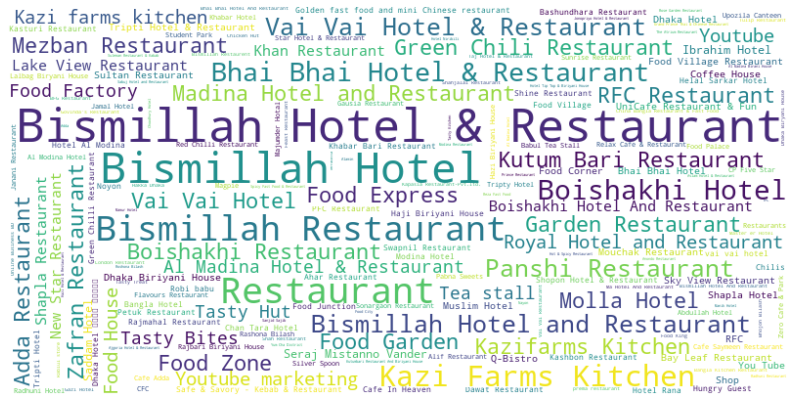

### These are the Most Frequently Used Restaurant Names in English

In [5]:
data = en_bd_restaurant.name.value_counts().to_dict()

wc = WordCloud(width=800, height=400,background_color="white", max_font_size=300).generate_from_frequencies(data)
plt.figure(figsize=(14,10))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()
result = wc.to_file("English_word_cloud.png")
printmd("### These are the Most Frequently Used Restaurant Names in English")

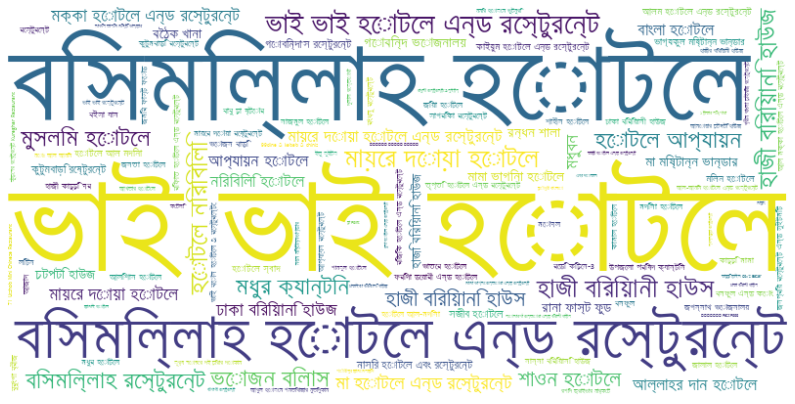

### These are the Most Frequently Used Restaurant Names in Bangla

In [7]:
from bnlp.corpus import stopwords, punctuations
regex = r"[\u0980-\u09FF]+" 
data = non_en_bd_restaurant.name.value_counts().to_dict()

wc = WordCloud(width=800, height=400,background_color="white", max_font_size=300, font_path="/content/Siyamrupali.ttf", regexp=regex).generate_from_frequencies(data)
plt.figure(figsize=(14,10))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()
result = wc.to_file("Bangla_word_cloud.png")
printmd("### These are the Most Frequently Used Restaurant Names in Bangla")

## Heat Map

In [11]:
import geopandas
import folium
from folium.plugins import MarkerCluster, HeatMap

geometry = geopandas.points_from_xy(bd_restaurant.longitude, bd_restaurant.latitude)
geo_df = geopandas.GeoDataFrame(bd_restaurant[['longitude', 'latitude']], geometry=geometry)

geo_df.head()

bd_coordinate = [23.6850, 90.3563]

site_map = folium.Map(location=bd_coordinate, tiles='Cartodb dark_matter', zoom_start=8)
heat_data = [[point.xy[1][0], point.xy[0][0]] for point in geo_df.geometry ]

# heat_data
HeatMap(heat_data).add_to(site_map)

site_map


## Restaurants With Price Range

**Plotting only those restaurants that have price levels**

*   `$` means Cheap
*   `$$` means Moderate
*   `$$$` means Expensive
*   `$$$` means Very Expensive 


In [69]:
bd_coordinate = [23.6850, 90.3563]
site_map = folium.Map(location=bd_coordinate, zoom_start=7)

data = bd_restaurant[bd_restaurant['affluence'].notna()==True]

for i in range(0, len(data)):
    folium.Marker(
        location=[data.iloc[i]['latitude'], data.iloc[i]['longitude']],
        popup=data.iloc[i]['name'],
        tooltip=str(data.iloc[i]['name'])+','+str(data.iloc[i]['affluence'])
    ).add_to(site_map)
site_map

## Restaurants According to Reviews

In [42]:
bd_coordinate = [23.6850, 90.3563]
circle_map = folium.Map(location=bd_coordinate, zoom_start=8, prefer_canvas=True,)
data = bd_restaurant[bd_restaurant['affluence'].notna()==True]

data['number_of_reviews'].fillna(0, inplace=True)
data['number_of_reviews'] = data['number_of_reviews'].astype(int, errors='ignore')

occurences = folium.map.FeatureGroup()

n_mean = data['number_of_reviews'].mean()

for lat, lng, number, name in zip(data['latitude'],
                                        data['longitude'],
                                        data['number_of_reviews'], data['name']):
  occurences.add_child(
      folium.vector_layers.CircleMarker(
          [lat, lng],
          radius=number/(n_mean/3), # radius for number of occurrences
          color='yellow',
          fill=True,
          fill_color='blue',
          fill_opacity=0.4,
          tooltip=str(number)+','+str(name),
          # get more from tooltip https://github.com/python-visualization/folium/issues/1010#issuecomment-435968337
      )
  )

circle_map.add_child(occurences)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## Expensive Restaurants with Ratings

In [62]:
data = bd_restaurant[bd_restaurant['affluence'].notna()==True]
data_expensive = data[data['affluence'] == "$$$"]


bd_coordinate = [23.6850, 90.3563]
expensive_map = folium.Map(location=bd_coordinate, zoom_start=10, prefer_canvas=True,)

for i in range(0, len(data_expensive)):
    folium.Marker(
        location=[data_expensive.iloc[i]['latitude'], data_expensive.iloc[i]['longitude']],
        # popup=data_expensive.iloc[i]['name'],
        tooltip=str(data_expensive.iloc[i]['name'])+','+str(data_expensive.iloc[i]['rating'])
    ).add_to(expensive_map)

expensive_map

## Very Expensive Restaurants with Ratings

In [63]:
data = bd_restaurant[bd_restaurant['affluence'].notna()==True]
data_very_expensive = data[data['affluence'] == "$$$$"]


bd_coordinate = [23.6850, 90.3563]
very_expensive_map = folium.Map(location=bd_coordinate, zoom_start=10, prefer_canvas=True,)

for i in range(0, len(data_very_expensive)):
    folium.Marker(
        location=[data_very_expensive.iloc[i]['latitude'], data_very_expensive.iloc[i]['longitude']],
        # popup=data_expensive.iloc[i]['name'],
        tooltip=str(data_very_expensive.iloc[i]['name'])+','+str(data_very_expensive.iloc[i]['rating'])
    ).add_to(very_expensive_map)

very_expensive_map

# Remarks


---

**The dataset may contain some anomalies such as Tea Stores or Food Stores that are also registered under Restaurant keyword. More extensive cleaning can be done to handle such issues in the future.**
